# Hyun-Joon Yang
# yanghyun@usc.edu
# BISC 444
# Final Project

<hr>

## 0) Introduction

## 1) Setup

In [1]:
rm(list=ls())

In [2]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("DNAshapeR")

In [3]:
# install.packages('caret')

In [4]:
library(DNAshapeR)
library(caret)
library(ggplot2)
library(grid)

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Warni

## 2) Predict shape from sequence

DNAshapeR package was used to predict DNA shape for each sequence bound by transcription factor Mad, Max and Myc. The datasets were obtained from the in vitro gcPBM (genomic context protein binding microarray) assay. The sequence data in FASTA format (Mad.fa, Max.fa and Myc.fa).

In [5]:
# names
ns <- c('Mad', 'Max', 'Myc')

#### Preview of the raw data
For each of the TF's FASTA file is just a single column in which the rows alternate by comment 'seq#' and the actual sequence that is 36 nucleotides long.

In [6]:
cat('Mad')
head(read.table('Mad.fa'))
dim(read.table('Mad.fa'))
cat('Max')
head(read.table('Max.fa'))
dim(read.table('Max.fa'))
cat('Myc')
head(read.table('Myc.fa'))
dim(read.table('Myc.fa'))

Mad

V1
>seq1
GGGCATGAAAGCCACCTCGTGGTTTTGCAGCAAGTG
>seq2
CGGGGAGGAGCCACCCACGCGCCACAGCAAGTCCTG
>seq3
GGCGGCCCGGGCATCCACGTGGGTCGGGCTCCTGGT


[1] 15068     1

Max

V1
>seq1
GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC
>seq2
TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA
>seq3
GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT


[1] 17136     1

Myc

V1
>seq1
ACCGACCGGCGCGGGCACGAGGCAATGGCGGCCGGG
>seq2
AACAGCGCCACCGGCCTCGTGCACTTCTTCCACTGT
>seq3
GCGGCCGGTCTGCACCATGCTGCGAACGTCCGTCCT


[1] 13852     1

#### Get the shape using DNAShapeR
Using the DNAShapeR package, the shape of the sequence was predicted. The shape includes intra-base pair parameters like minor groove width (MGW) and propeller twist (ProT) as well as inter-base pair parameters like roll (Roll) and helical twist (HelT).

In [7]:
# list for each shape output
shapes <- list()
# get shape for each file
for (n in ns) {
    fn <- paste(n,'.fa', sep='')
    shapes[[length(shapes) + 1]] <- getShape(fn)
}
# add names
names(shapes) <- ns

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......
Record length: 36
Record length: 35
Record length: 36
Record length: 35
Record length: 36
Done


Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......
Record length: 36
Record length: 35
Record length: 36
Record length: 35
Record length: 36
Done


Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......
Record length: 36
Record length: 35
Record length: 36
Record length: 35
Record length: 36
Done


#### Preview of the shape data
For each of the TFs, matrix for the shape is created. For intra-base pair parameters, the dimensions are m x 36, whereas for inter-base pair parameters, the dimensions are m x 35. Here, m is the number of sequences (ie number of rows with sequences in the FASTA file)

In [8]:
cat('MGW', dim(shapes[[1]]$MGW))
head(shapes[[1]]$MGW)
cat('ProT', dim(shapes[[1]]$ProT))
head(shapes[[1]]$ProT)
cat('Roll', dim(shapes[[1]]$Roll))
head(shapes[[1]]$Roll)
cat('HelT', dim(shapes[[1]]$HelT))
head(shapes[[1]]$HelT)

MGW 7534 36

NA,NA,5.02,5.33,5.50,5.27,5.50,5.40,4.36,4.03,...,5.78,5.79,5.67,5.27,5.08,5.45,4.52,4.14,NA,NA
NA,NA,4.94,4.76,4.85,4.93,4.80,4.63,5.05,4.67,...,5.27,5.08,5.45,4.52,3.74,4.51,4.81,4.92,NA,NA
NA,NA,5.29,5.37,4.96,4.77,4.95,5.19,5.19,4.95,...,4.95,4.61,4.67,5.05,4.63,4.92,5.40,5.19,NA,NA
NA,NA,5.59,5.37,4.83,4.17,4.82,4.92,5.38,5.43,...,4.98,5.69,5.69,4.68,4.33,5.43,5.62,5.01,NA,NA
NA,NA,5.10,5.20,5.46,5.40,4.77,4.94,5.52,5.41,...,4.96,4.77,4.82,4.62,4.42,4.05,4.52,5.21,NA,NA
NA,NA,5.67,5.13,5.15,5.37,4.96,4.77,4.82,4.89,...,4.14,5.31,5.41,4.66,4.77,5.56,5.46,4.93,NA,NA


ProT 7534 36

NA,NA,-2.52,-3.12,-9.43,-9.26,-6.07,-10.81,-11.93,-10.58,...,-3.80,-3.68,-6.76,-1.72,-3.36,-9.90,-10.21,-4.48,NA,NA
NA,NA,-1.95,-1.44,-4.60,-5.75,-0.44,-4.81,-6.07,-0.53,...,-1.72,-3.36,-9.90,-10.21,-4.07,-7.34,-5.39,-0.90,NA,NA
NA,NA,-3.13,-3.73,-2.72,-1.93,-2.73,-3.26,-3.26,-2.73,...,-2.73,-2.48,-0.53,-6.07,-4.81,-0.90,-5.54,-4.44,NA,NA
NA,NA,-4.13,-3.73,-3.04,-1.55,-8.01,-9.80,-6.08,-3.40,...,-1.39,-6.51,-6.51,-1.54,-5.43,-7.21,-10.31,-8.92,NA,NA
NA,NA,-0.94,-6.78,-6.31,-2.99,-2.82,-1.28,-5.92,-3.20,...,-2.72,-1.93,-2.13,-1.32,-0.14,-9.21,-12.85,-12.03,NA,NA
NA,NA,-6.76,-1.72,-3.78,-3.73,-2.72,-1.93,-2.13,-2.02,...,-4.48,-7.40,-2.94,-3.38,-5.89,-7.11,-4.03,-2.54,NA,NA


Roll 7534 35

NA,-1.78,-1.87,4.47,-4.16,5.82,0.27,-2.32,-5.01,-3.83,...,4.28,-0.97,3.49,-1.98,-2.27,4.12,-3.49,-2.57,-4.51,NA
NA,-1.77,-2.04,-1.11,-1.89,-3.06,-1.35,-2.10,-2.75,-3.46,...,-1.98,-2.27,4.12,-3.49,-3.18,-4.65,-2.33,-1.00,-2.79,NA
NA,-2.02,2.29,-1.31,-2.20,-2.04,-1.65,1.93,-1.65,-1.75,...,-1.73,-1.84,-3.01,-2.75,-2.10,-1.19,-2.83,2.76,-0.64,NA
NA,-0.88,2.76,-1.38,-3.24,-3.25,-3.53,-0.35,3.33,-1.21,...,-1.19,-2.37,4.92,-2.59,-2.29,-4.10,5.46,-3.06,-2.56,NA
NA,-2.29,-2.33,-1.19,3.83,-1.91,-1.85,-2.71,3.17,-1.88,...,-1.31,-2.20,-2.16,-2.21,-3.04,-4.21,-4.82,-2.68,6.09,NA
NA,3.55,-2.01,-1.79,2.61,-1.31,-2.20,-2.16,-2.06,-2.12,...,-2.83,-3.73,2.59,-1.93,-1.25,-2.77,2.77,-1.64,-2.42,NA


HelT 7534 35

NA,33.82,36.28,34.74,31.64,35.02,35.14,35.91,36.33,32.65,...,34.48,35.56,34.50,31.26,36.80,34.39,34.91,33.12,34.91,NA
NA,33.22,33.58,33.57,35.58,31.48,34.15,35.99,31.38,37.36,...,31.29,36.80,34.39,34.91,33.14,35.20,35.91,34.36,31.21,NA
NA,36.31,32.39,33.33,36.73,33.67,33.34,32.53,33.34,33.80,...,33.51,33.64,37.20,31.38,35.99,34.17,31.19,34.13,34.39,NA
NA,35.63,32.80,33.36,37.48,32.28,35.03,35.42,32.57,33.11,...,34.50,31.56,34.19,31.46,35.12,34.62,34.49,34.86,32.17,NA
NA,36.61,31.44,35.22,32.59,36.26,34.17,31.16,33.84,36.24,...,33.33,36.73,33.62,33.59,34.00,32.37,36.09,35.59,35.41,NA
NA,34.49,31.24,36.70,32.40,33.33,36.73,33.62,33.53,33.36,...,33.08,34.64,34.10,33.54,34.52,34.03,34.23,33.17,37.04,NA


## 3) Preprocess the data

In order to train the models, dataset containing training examples were created. The 2 separate datsets were created, one with only the sequence as input and the other with sequence + shape features.

#### Encoding sequence
To create the dataset, the sequences need to be converted into numeric values. This was achieved by using one-hot encoding where 4-bit binary vector represents each letter as follows:

A: [0,0,0,1] <br>
C: [0,0,1,0] <br>
G: [0,1,0,0] <br>
T: [1,0,0,0] <br>

Using this, the sequence ACCTG would be [0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0]

Below is the function that was used to encode the sequence:

In [9]:
# encode nucleotide
# gets nucleotide and returns the corresponding one-hot encoding
encodeNucleotide <- function(nucleotide) {
    dict <- list(A=c(0,0,0,1), C=c(0,0,1,0), G=c(0,1,0,0), T=c(1,0,0,0))
    return(dict[nucleotide])
}

# encode sequence
# gets sequence and returns vector of one-hot encoded sequence
encodeSequence <- function(sequence) {
    nucleotides <- strsplit(sequence, split='', fixed=T)
    result <- unlist(lapply(nucleotides, encodeNucleotide))
    names(result) <- c()
    return(result)
}

# encode FASTA
# gets FASTA file and returns matrix of one-hot encoded sequences
encodeFASTA <- function(filename) {
    # read FASTA
    fa <- read.table(filename, comment.char='>')
    # encode sequence
    result <- apply(fa, 1, encodeSequence)
    # transpose
    result <- t(result)
    return(result)
}

#### Creating feature matrix
Feature matrix for each TF was created as inputs to the model. For the sequence only model, the features were the one-hot encoded sequences. For the sequence + shape model, the one-hot encoded sequences were combined with shape features.

In [10]:
# create list of feature matrices for each file
features.seq <- list()
features.shape <- list()

# loop over files
for (n in ns) {
    # add 1-mer feature vector
    features.seq[[n]] <- encodeFASTA(paste(n, '.fa', sep=''))
    # combine intra bp parameters
    features.shape[[n]] <- cbind(features.seq[[n]], shapes[[n]]$MGW, shapes[[n]]$ProT)
    # combine inter bp parameters
    features.shape[[n]] <- cbind(features.shape[[n]], shapes[[n]]$Roll, shapes[[n]]$HelT)
}

#### Remove NA values
Since the model cannot compute NA values, columns with NA values were dropped (ie columns in inter-base parameters).

In [11]:
# remove columns with NA
for (n in ns) {
    features.seq[[n]] <- features.seq[[n]][, colSums(is.na(features.seq[[n]])) == 0]
    features.shape[[n]] <- features.shape[[n]][, colSums(is.na(features.shape[[n]])) == 0]
}

#### Add ground truth
To learn the weights so that the model can minimize the error, ground truth was added to the dataset. Ground truth values were obtained from High-Throughput protein-DNA binding data in the form of `*.s` files. These files contain the sequences in the `*.fa` files and their corresponding binding affinity.

In [12]:
head(read.table('Mad.s'))

V1,V2
GGGCATGAAAGCCACCTCGTGGTTTTGCAGCAAGTG,8.763428
CGGGGAGGAGCCACCCACGCGCCACAGCAAGTCCTG,7.903412
GGCGGCCCGGGCATCCACGTGGGTCGGGCTCCTGGT,10.208874
TGCGGCTTCGGCTTCCACGCGGCATCCTAGGTAAGC,8.273974
TGCTCGCCTGCCTGCCATGTGCAGCGGCCCCTTTGT,8.325185
GCAGCGGCCCCATCCCACGTGGTTAAGTGGGTGGCC,10.389595


In [13]:
# add ground truth to features
data.seq <- list()
data.shape <- list()
for (n in ns) {
    gt <- read.table(paste(n, '.s', sep=''))[,2]
    data.seq[[n]] <- cbind(features.seq[[n]], gt)
    data.shape[[n]] <- cbind(features.shape[[n]], gt)
}

## 4) Train model
The caret package was used to train various models. First, the same model used in previous study e-SVR `svmLinear` was trained on sequence data as well as sequence + shape data as control. Then, the other model `glmnet` was trained on sequence + shape data to compare with the control model.

#### Set seed

In [14]:
set.seed(100)

#### Split the data
Split the data for training & testing for both sequence data and shape data

In [15]:
# split data
train.data.shape <- list()
test.data.shape <- list()

for (n in ns) {
    trainIndex <- createDataPartition(data.shape[[n]][,ncol(data.shape[[n]])], p=.8, list = FALSE, times=1)
    train.data.shape[[n]] <- data.shape[[n]][trainIndex,]
    test.data.shape[[n]] <- data.shape[[n]][-trainIndex,]
}

In [16]:
# split data
train.data.seq <- list()
test.data.seq <- list()
for (n in ns) {
    trainIndex <- createDataPartition(data.seq[[n]][,ncol(data.seq[[n]])], p=.8, list = FALSE, times=1)
    train.data.seq[[n]] <- data.seq[[n]][trainIndex,]
    test.data.seq[[n]] <- data.seq[[n]][-trainIndex,]
}

#### Set cross-validation
Use 10-fold cross-validation in training

In [17]:
# cross validation
fitControl <- trainControl(method="cv", number=10, savePredictions=TRUE)

#### Train Lasso regression model (L1-normalization)

*SHAPE*

In [18]:
model.l1.shape <- list()
for (n in ns) {
    model.l1.shape[[n]] <- train(gt~., data=data.frame(train.data.shape[[n]]), trControl=fitControl, method="glmnet",
                                tuneGrid=data.frame(alpha = c(2^c(-15:0)), lambda=0))
}

In [19]:
for (n in ns) {
    saveRDS(model.l1.shape[[n]], paste('l1_shape_', n, '.rds', sep=''))
}

In [17]:
model.l1.shape <- list()
for (n in ns) {
    model.l1.shape[[n]] <- readRDS(paste('l1_shape_', n, '.rds', sep=''))
}

*SEQUENCE*

In [20]:
model.l1.seq <- list()
for (n in ns) {
    model.l1.seq[[n]] <- train(gt~., data=data.frame(train.data.seq[[n]]), trControl=fitControl, method="glmnet",
                                tuneGrid=data.frame(alpha = c(2^c(-15:0)), lambda=0))
}

In [21]:
for (n in ns) {
    saveRDS(model.l1.seq[[n]], paste('l1_seq_', n, '.rds', sep=''))
}

In [18]:
model.l1.seq <- list()
for (n in ns) {
    model.l1.seq[[n]] <- readRDS(paste('l1_seq_', n, '.rds', sep=''))
}

#### Train Ridge regression model (L2-normalization)
*SHAPE*

In [22]:
model.l2.shape <- list()
for (n in ns) {
    model.l2.shape[[n]] <- train(gt~., data=data.frame(train.data.shape[[n]]), trControl=fitControl, method="glmnet",
                   tuneGrid=data.frame(alpha = 0, lambda=c(2^c(-15:15))))
}

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [23]:
for (n in ns) {
    saveRDS(model.l2.shape[[n]], paste('l2_shape_', n, '.rds', sep=''))
}

In [19]:
model.l2.shape <- list()
for (n in ns) {
    model.l2.shape[[n]] <- readRDS(paste('l2_shape_', n, '.rds', sep=''))
}

*SEQUENCE*

In [24]:
model.l2.seq <- list()
for (n in ns) {
    model.l2.seq[[n]] <- train(gt~., data=data.frame(train.data.seq[[n]]), trControl=fitControl, method="glmnet",
                   tuneGrid=data.frame(alpha = 0, lambda=c(2^c(-15:15))))
}

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [25]:
for (n in ns) {
    saveRDS(model.l2.seq[[n]], paste('l2_seq_', n, '.rds', sep=''))
}

In [20]:
model.l2.seq <- list()
for (n in ns) {
    model.l2.seq[[n]] <- readRDS(paste('l2_seq_', n, '.rds', sep=''))
}

## 5) Results & Analysis

In [26]:
for (n in ns) {
    print(n)
    print(model.l1.shape[[n]])
    print(model.l1.seq[[n]])
    print(model.l2.shape[[n]])
    print(model.l2.seq[[n]])
}

[1] "Mad"
glmnet 

6029 samples
 274 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5426, 5425, 5426, 5425, 5427, 5427, ... 
Resampling results across tuning parameters:

  alpha         RMSE       Rsquared   MAE      
  3.051758e-05  0.3023956  0.8630964  0.2470891
  6.103516e-05  0.3024041  0.8630885  0.2470949
  1.220703e-04  0.3024412  0.8630538  0.2471225
  2.441406e-04  0.3024301  0.8630736  0.2471049
  4.882812e-04  0.3024666  0.8630537  0.2471123
  9.765625e-04  0.3026568  0.8628752  0.2472834
  1.953125e-03  0.2653467  0.8945058  0.2150875
  3.906250e-03  0.2290208  0.9211907  0.1834201
  7.812500e-03  0.2028127  0.9376016  0.1605457
  1.562500e-02  0.1885126  0.9455057  0.1480623
  3.125000e-02  0.1817585  0.9490030  0.1422470
  6.250000e-02  0.1779598  0.9509932  0.1390717
  1.250000e-01  0.1756105  0.9522567  0.1369009
  2.500000e-01  0.1730768  0.9536027  0.1345672
  5.000000e-01  0.1717666  0.9543011  0.1333699
  1.000000e+00 

In [27]:
str(model.l1.shape[[1]])

List of 23
 $ method      : chr "glmnet"
 $ modelInfo   :List of 15
  ..$ label     : chr "glmnet"
  ..$ library   : chr [1:2] "glmnet" "Matrix"
  ..$ type      : chr [1:2] "Regression" "Classification"
  ..$ parameters:'data.frame':	2 obs. of  3 variables:
  .. ..$ parameter: chr [1:2] "alpha" "lambda"
  .. ..$ class    : chr [1:2] "numeric" "numeric"
  .. ..$ label    : chr [1:2] "Mixing Percentage" "Regularization Parameter"
  ..$ grid      :function (x, y, len = NULL, search = "grid")  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 7 26 27 19 26 19 7 27
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x000000003e936938> 
  ..$ loop      :function (grid)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 28 26 39 19 26 19 28 39
  .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x000000003e936938> 
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  .. ..- attr(*, "srcref")= 'srcref' int [1:8] 40 25 66 

#### Predictions

In [28]:
pred.l1.shape <- list()
pred.l1.seq <- list()
for (n in ns) {
    pred.l1.shape[[n]] <- predict(model.l1.shape[[n]], test.data.shape[[n]])
    pred.l1.seq[[n]] <- predict(model.l1.seq[[n]], test.data.seq[[n]])
}

In [29]:
pred.l2.shape <- list()
pred.l2.seq <- list()
for (n in ns) {
    pred.l2.shape[[n]] <- predict(model.l2.shape[[n]], test.data.shape[[n]])
    pred.l2.seq[[n]] <- predict(model.l2.seq[[n]], test.data.seq[[n]])
}

#### Compare sequence vs shape

In [30]:
## Theme
my.theme <- theme(
  axis.text = element_text(colour="black", size=12),
  axis.title.x = element_text(colour="black", size=12),
  axis.title.y = element_text(colour="black", size=12),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  axis.line = element_line(colour = "black"),
#  axis.text = element_text(colour ="black"),
  axis.ticks = element_line(colour = "black"),
)

In [31]:
RS <- function(y_prediction, y_testing){
   1 - ( sum( y_testing - y_prediction ) ^ 2 ) / sum( (y_testing - mean( y_testing ) ) ^ 2 )  
} 

*Rsquared on Test Data*

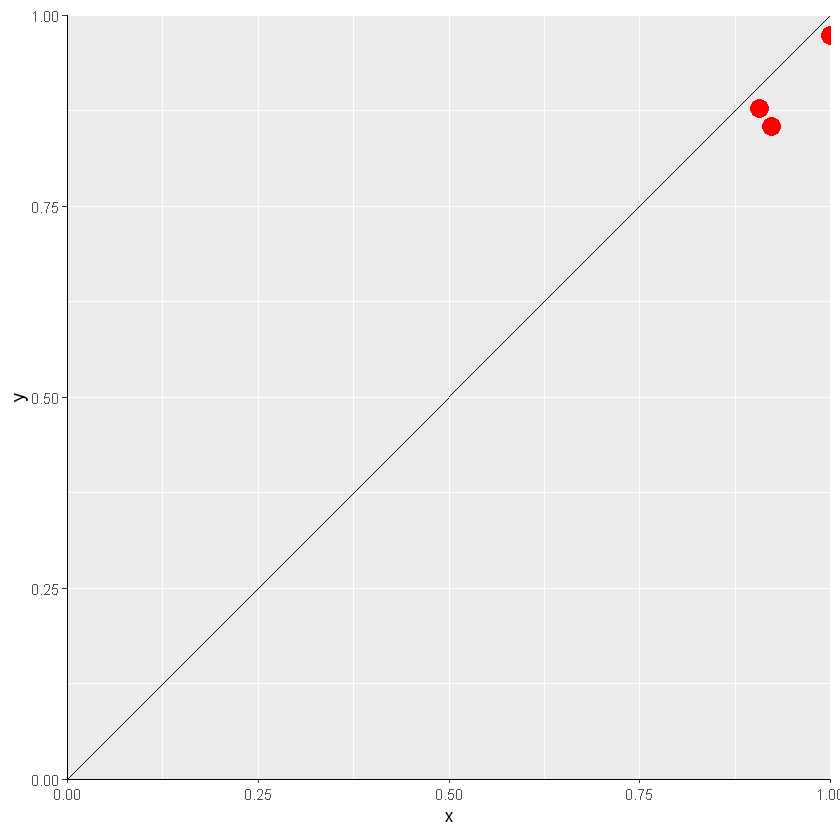

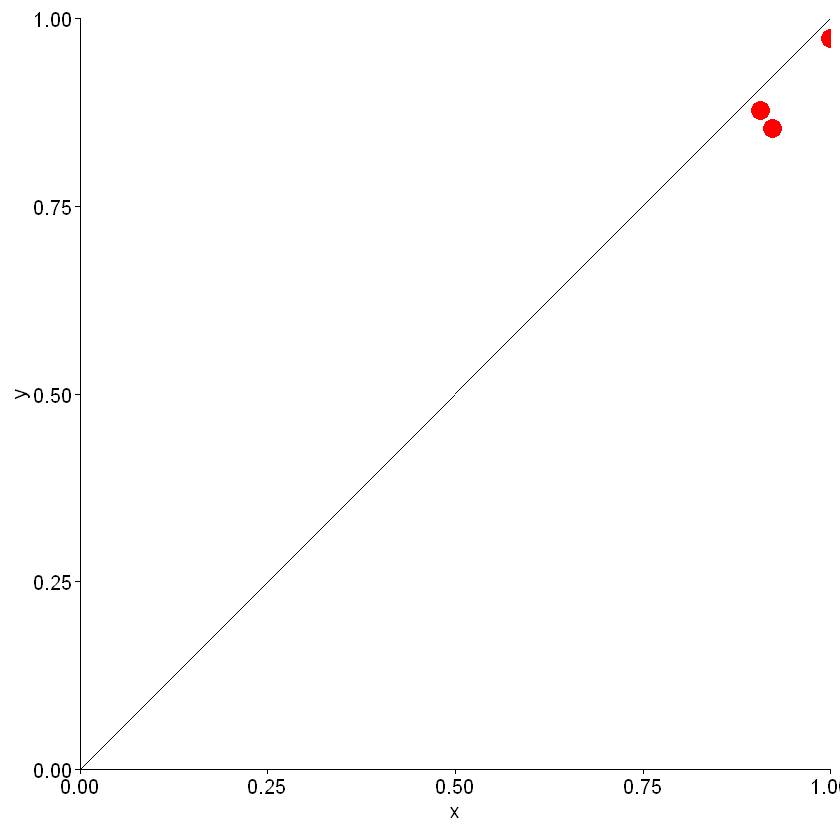

In [38]:
x <- c()
y <- c()
for (n in ns) {
    x <- c(x,RS(pred.l1.shape[[n]], data.frame(test.data.shape[[n]])$gt))
    y <- c(y,RS(pred.l1.seq[[n]], data.frame(test.data.seq[[n]])$gt))
}
print(ggplot() +
  geom_point(aes(x = x, y = y), color = "red", size=5) +
  geom_abline(slope=1) + geom_vline(xintercept=0) + geom_hline(yintercept=0) +
  coord_fixed(ratio = 1, xlim = c(0,1), ylim = c(0,1)) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0))) + my.theme

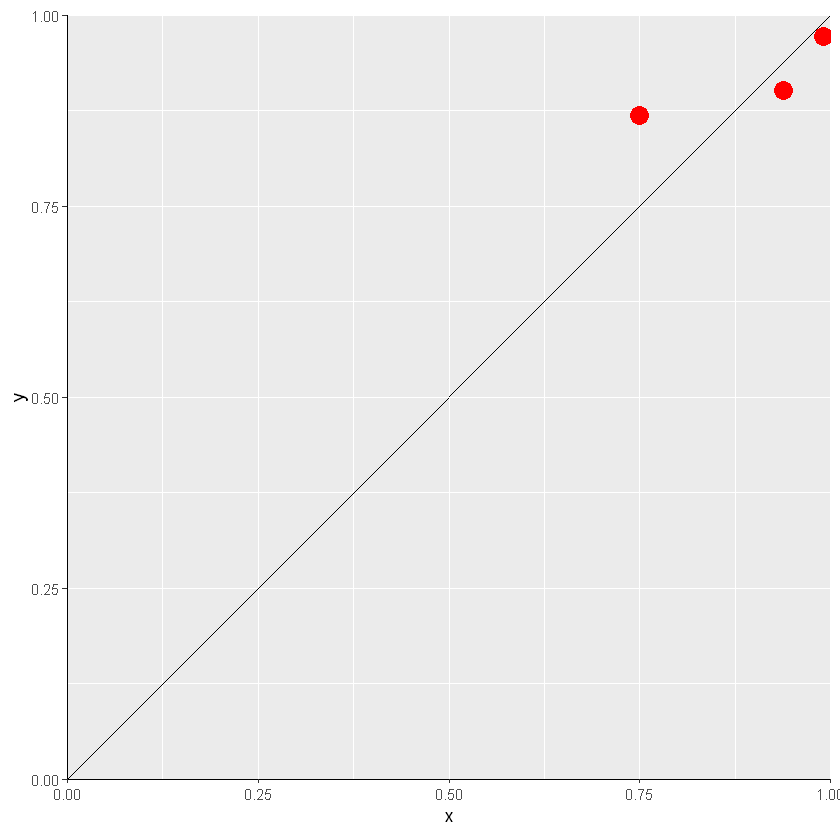

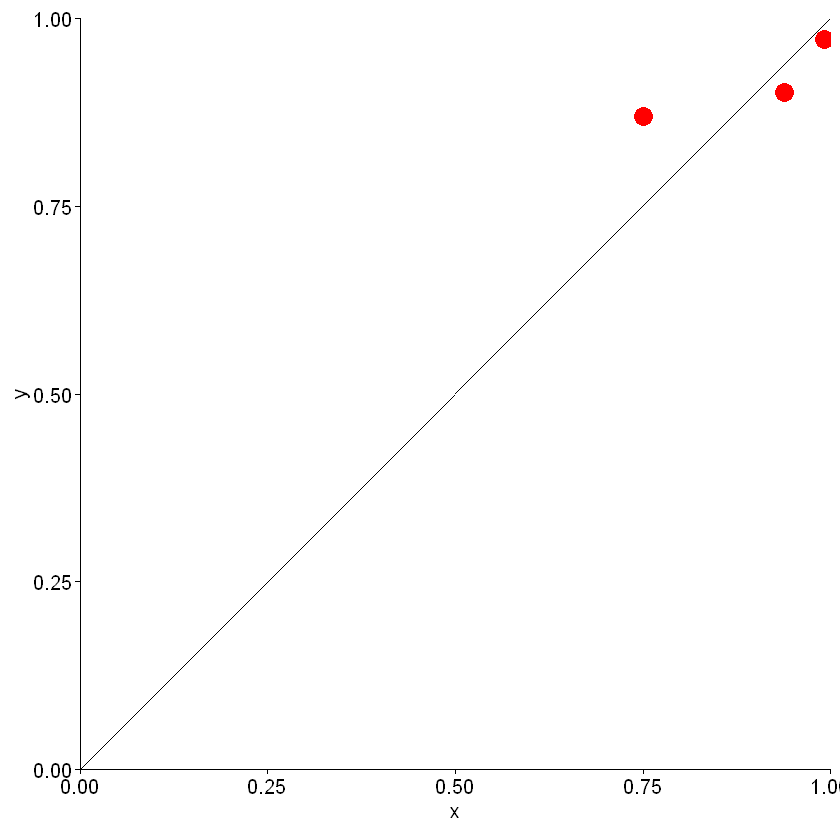

In [37]:
x <- c()
y <- c()
for (n in ns) {
    x <- c(x,RS(pred.l2.shape[[n]], data.frame(test.data.shape[[n]])$gt))
    y <- c(y,RS(pred.l2.seq[[n]], data.frame(test.data.seq[[n]])$gt))
}
print(ggplot() +
  geom_point(aes(x = x, y = y), color = "red", size=5) +
  geom_abline(slope=1) + geom_vline(xintercept=0) + geom_hline(yintercept=0) +
  coord_fixed(ratio = 1, xlim = c(0,1), ylim = c(0,1)) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0))) + my.theme

#### Compare models

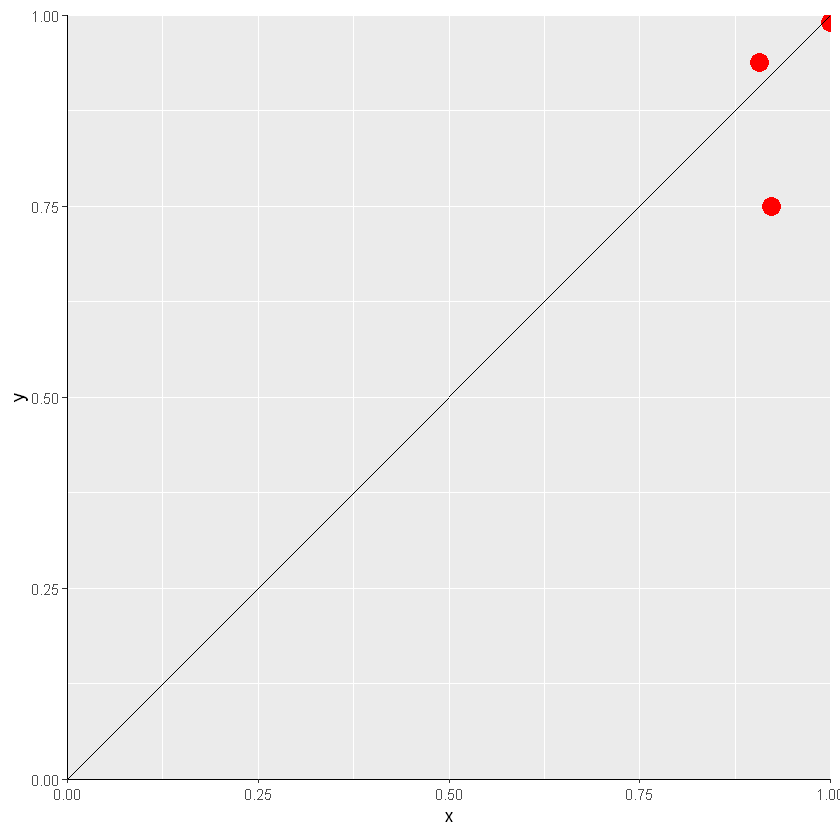

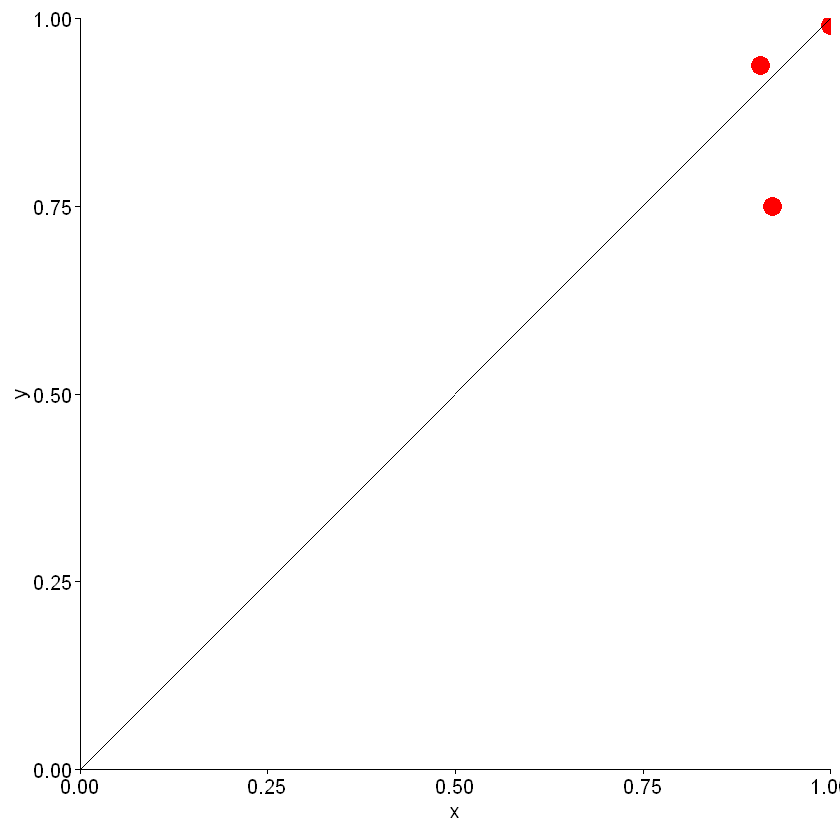

In [40]:
x <- c()
y <- c()
for (n in ns) {
    x <- c(x,RS(pred.l1.shape[[n]], data.frame(test.data.shape[[n]])$gt))
    y <- c(y,RS(pred.l2.shape[[n]], data.frame(test.data.shape[[n]])$gt))
}
print(ggplot() +
  geom_point(aes(x = x, y = y), color = "red", size=5) +
  geom_abline(slope=1) + geom_vline(xintercept=0) + geom_hline(yintercept=0) +
  coord_fixed(ratio = 1, xlim = c(0,1), ylim = c(0,1)) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0))) + my.theme